## Quantum Volume
- [qiskit-experiments doc](https://qiskit-extensions.github.io/qiskit-experiments/manuals/verification/quantum_volume.html)
- [qiskit-experiments API-quantum volume experiment](https://qiskit-extensions.github.io/qiskit-experiments/apidocs/mod_quantum_volume.html)
- [qiskit-experiments API-quantum volume](https://qiskit-extensions.github.io/qiskit-experiments/stubs/qiskit_experiments.library.quantum_volume.QuantumVolume.html#qiskit_experiments.library.quantum_volume.QuantumVolume)
- [qiskit-experiments API-quantum volume analysis](https://qiskit-extensions.github.io/qiskit-experiments/stubs/qiskit_experiments.library.quantum_volume.QuantumVolumeAnalysis.html#qiskit_experiments.library.quantum_volume.QuantumVolumeAnalysis)
- [qiskit API-quantum volume circuit](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.QuantumVolume)

Create QuantumVolume experiment

In [5]:
from qiskit_experiments.library import QuantumVolume

In [6]:
qubits = tuple(range(4)) # Can use specific qubits. for example [2, 4, 7, 10]
print(qubits)

(0, 1, 2, 3)


In [7]:
qv_exp = QuantumVolume(qubits)

Attributes

In [8]:
# print('analysis instance:',qv_exp.analysis)
print('backend:',qv_exp.backend)
print('experiment_options:',qv_exp.experiment_options)
print('experiment_type:',qv_exp.experiment_type)
print('num_qubits:',qv_exp.num_qubits)
print('physical_qubits:',qv_exp.physical_qubits)
# print('run_options:',qv_exp.run_options)
# print('transpile_options:',qv_exp.transpile_options)
qv_exp.config()

backend: None
experiment_options: Options(max_circuits=None, trials=100, seed=None)
experiment_type: QuantumVolume
num_qubits: 4
physical_qubits: (0, 1, 2, 3)


ExperimentConfig(cls=<class 'qiskit_experiments.library.quantum_volume.qv_experiment.QuantumVolume'>, args=((0, 1, 2, 3),), kwargs={}, experiment_options={'trials': 100, 'seed': None}, transpile_options={}, run_options={}, version='0.5.4')

Quantum Volume Circuit

In [9]:
qc = qv_exp.circuits()
print('experiment_options:',qv_exp.experiment_options)
print(len(qc))

experiment_options: Options(max_circuits=None, trials=100, seed=None)
100


/home/tim/anaconda3/envs/qiskit_0.45.1/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


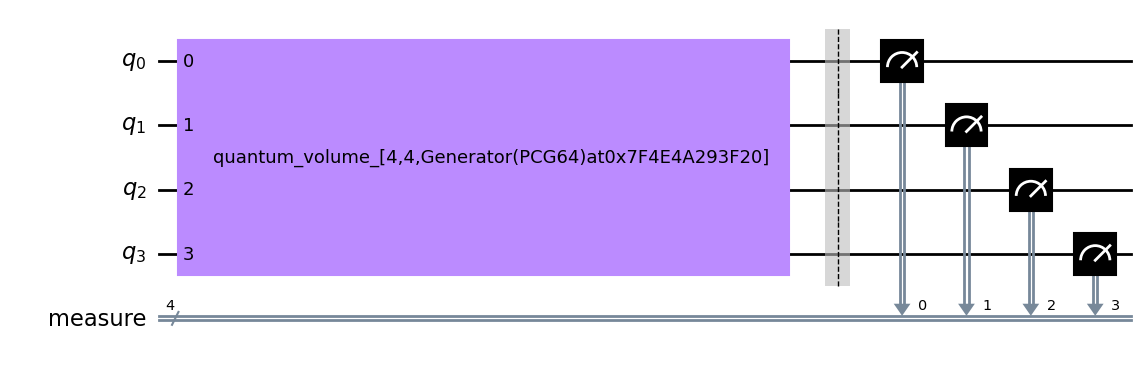

In [10]:
qc[0].draw('mpl')

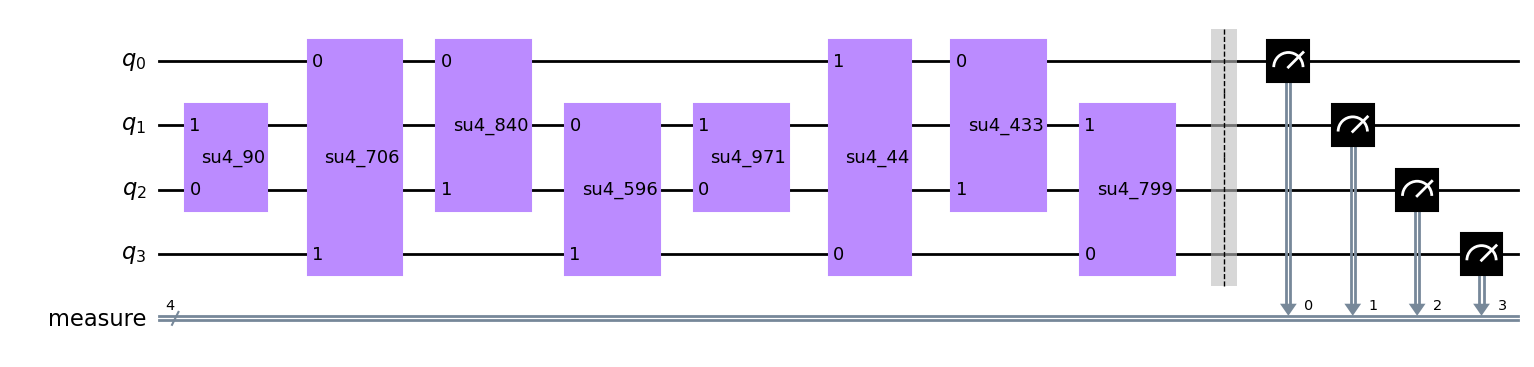

In [11]:
qc[0].decompose().draw('mpl')

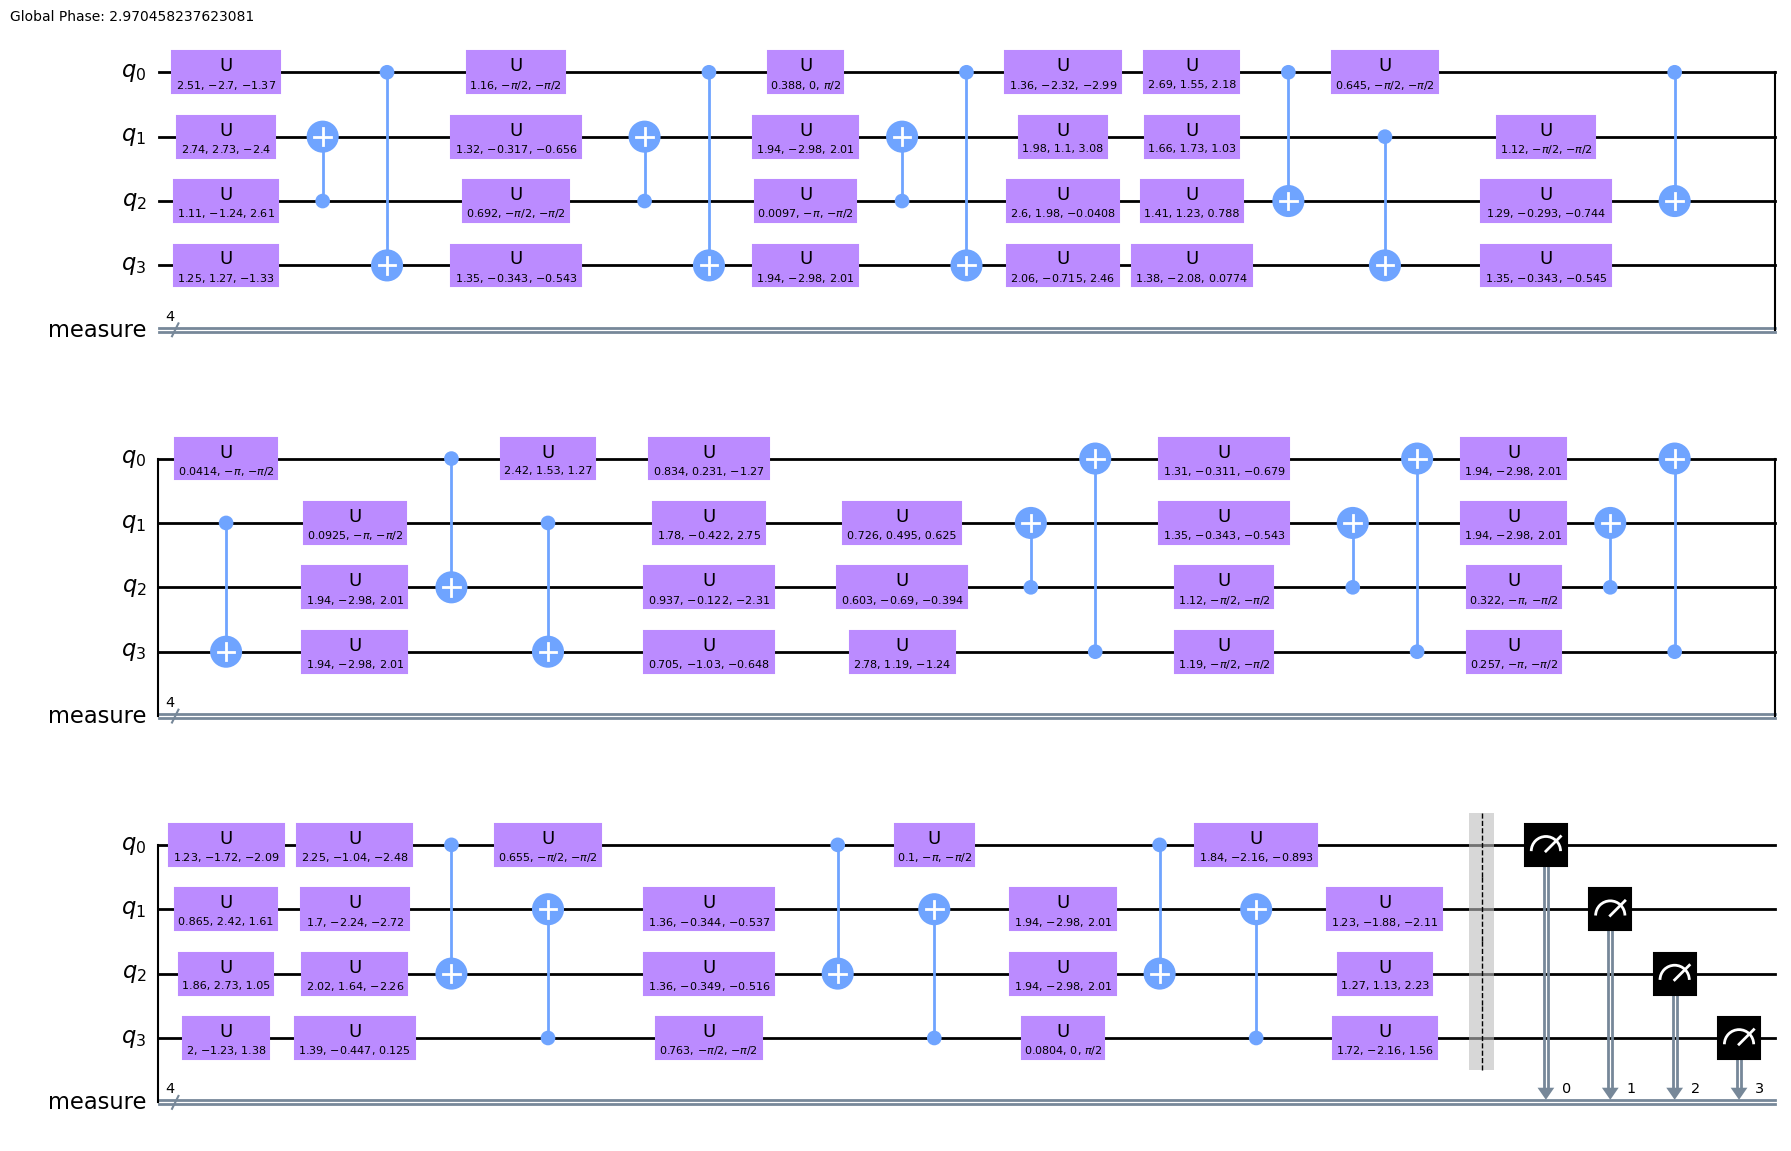

In [12]:
qc[0].decompose().decompose().draw('mpl')

Random Quantum Volume Circuit

In [13]:
qv_exp = QuantumVolume(qubits)
qc = qv_exp.circuits()

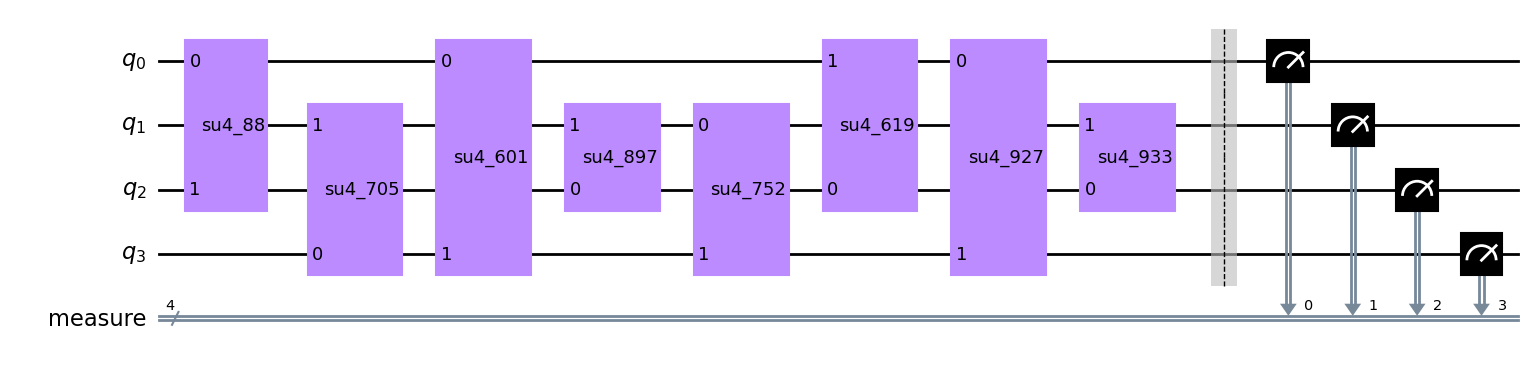

In [14]:
qc[0].decompose().draw('mpl')

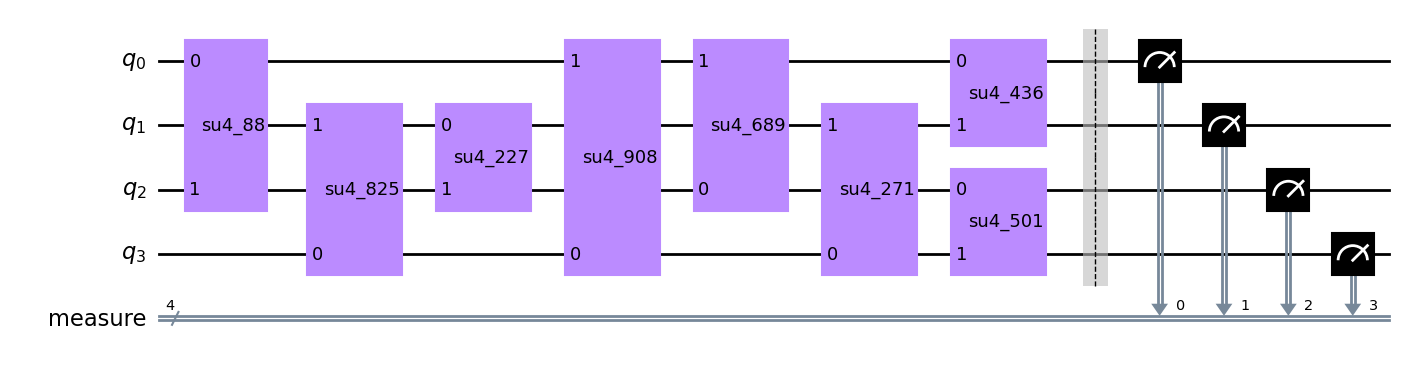

In [15]:
qc[1].decompose().draw('mpl')

Add seed

In [16]:
qv_exp = QuantumVolume(qubits,seed=20)
qc = qv_exp.circuits()
print('experiment_options:',qv_exp.experiment_options)

experiment_options: Options(max_circuits=None, trials=100, seed=20)


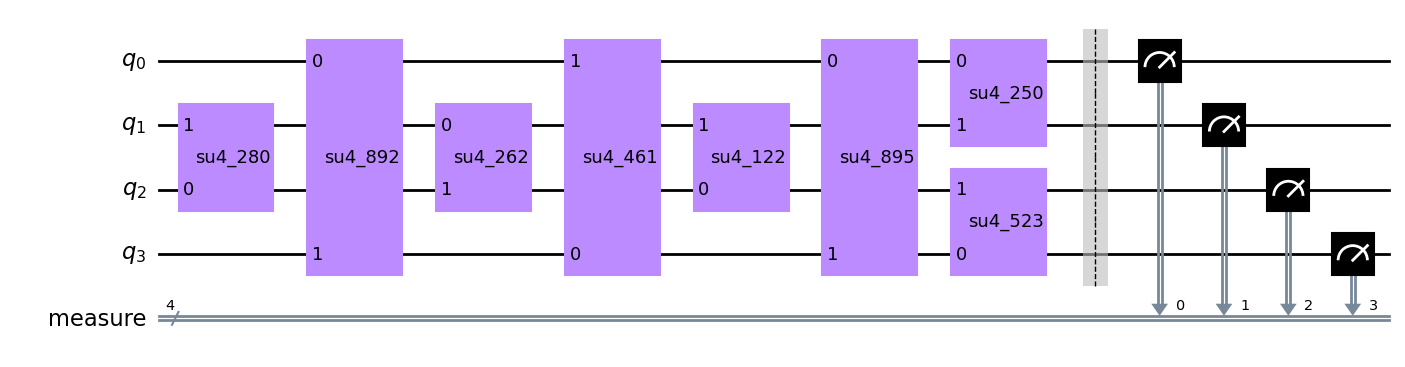

In [17]:
qc[0].decompose().draw('mpl')

Change trials

In [18]:
qv_exp = QuantumVolume(qubits,seed=20)

In [19]:
print('run_options:',qv_exp.run_options)
qv_exp.set_run_options(trials=10)
print('run_options:',qv_exp.run_options)

run_options: Options(meas_level=<MeasLevel.CLASSIFIED: 2>)
run_options: Options(meas_level=<MeasLevel.CLASSIFIED: 2>, trials=10)


Qiskit Aer for single QV circult

In [20]:
from qiskit_aer import AerSimulator, StatevectorSimulator

In [21]:
seed = 20
qc_qv = qc[1].decompose()

In [22]:
# StatevectorSimulator
backend_st = StatevectorSimulator(shots=1024, 
                                  precision='double', 
                                  max_parallel_threads=0, 
                                  max_parallel_experiments=1, 
                                  max_parallel_shots=None, 
                                  seed_simulator=seed, 
                                  statevector_parallel_threshold=25
                                 )
print('backend opt:',backend_st.options)

backend opt: Options(shots=1024, device='CPU', precision='double', executor=None, max_job_size=None, max_shot_size=None, zero_threshold=1e-10, validation_threshold=None, max_parallel_threads=0, max_parallel_experiments=1, max_parallel_shots=None, max_memory_mb=None, seed_simulator=20, fusion_enable=True, fusion_verbose=False, fusion_max_qubit=5, fusion_threshold=14, statevector_parallel_threshold=25)


In [23]:
expdata_st = backend_st.run(qc_qv).result()
counts_ideal_st = expdata_st.get_counts(0)
print('Counts(ideal):', counts_ideal_st)

Counts(ideal): {'1010': 4, '0001': 13, '0111': 45, '0011': 94, '1011': 10, '1101': 16, '0110': 257, '1000': 43, '0101': 14, '1001': 95, '1100': 14, '0000': 134, '0010': 64, '1110': 110, '1111': 48, '0100': 63}


In [24]:
# AerSimulator
backend_Aer = AerSimulator(method='statevector', 
                           precision='double',          # "single" or "double"
                           max_parallel_threads=0,      # maximum number of CPU cores used by OpenMP for parallelization
                           max_parallel_experiments=1,  # maximum number of qobj experiments that may be executed in parallel
                           max_parallel_shots=None,     # maximum number of shots that may be executed in parallel during each experiment execution
                           blocking_enable=False,       # enables parallelization with multiple GPUs or multiple processes with MPI (CPU/GPU)
                           blocking_qubits=0,           # number of qubits of chunk size used for parallelizing with multiple GPUs or multiple processes with MPI (CPU/GPU)
                           chunk_swap_buffer_qubits=15, # number of qubits of maximum buffer size (=2^chunk_swap_buffer_qubits) used for multiple chunk-swaps over MPI processes
                           batched_shots_gpu=False,     # enables batched execution of multiple shot simulations on GPU devices
                           batched_shots_gpu_max_qubits=16,
                           num_threads_per_device=1,    # number of threads per device
                           shot_branching_enable=False,
                           shot_branching_sampling_enable=False,
                           accept_distributed_results=None,
                           runtime_parameter_bind_enable=False,
                           statevector_parallel_threshold=25,
                           statevector_sample_measure_opt=10,
                           seed_simulator=seed, 
                           )
print('backend opt:',backend_Aer.options)

backend opt: Options(shots=1024, method='statevector', device='CPU', precision='double', executor=None, max_job_size=None, max_shot_size=None, enable_truncation=True, zero_threshold=1e-10, validation_threshold=None, max_parallel_threads=0, max_parallel_experiments=1, max_parallel_shots=None, max_memory_mb=None, fusion_enable=True, fusion_verbose=False, fusion_max_qubit=None, fusion_threshold=None, accept_distributed_results=None, memory=None, noise_model=None, seed_simulator=20, cuStateVec_enable=False, blocking_qubits=0, blocking_enable=False, chunk_swap_buffer_qubits=15, batched_shots_gpu=False, batched_shots_gpu_max_qubits=16, num_threads_per_device=1, shot_branching_enable=False, shot_branching_sampling_enable=False, statevector_parallel_threshold=25, statevector_sample_measure_opt=10, stabilizer_max_snapshot_probabilities=32, extended_stabilizer_sampling_method='resampled_metropolis', extended_stabilizer_metropolis_mixing_time=5000, extended_stabilizer_approximation_error=0.05, ex

In [25]:
expdata_Aer = backend_Aer.run(qc_qv).result()
counts_ideal_Aer = expdata_Aer.get_counts(0)
print('Counts(ideal):', counts_ideal_Aer)

Counts(ideal): {'0010': 47, '1011': 13, '1101': 21, '1110': 100, '0100': 79, '0011': 127, '0111': 26, '0000': 144, '0101': 8, '1001': 83, '0110': 250, '1000': 37, '1100': 19, '1010': 5, '0001': 22, '1111': 43}


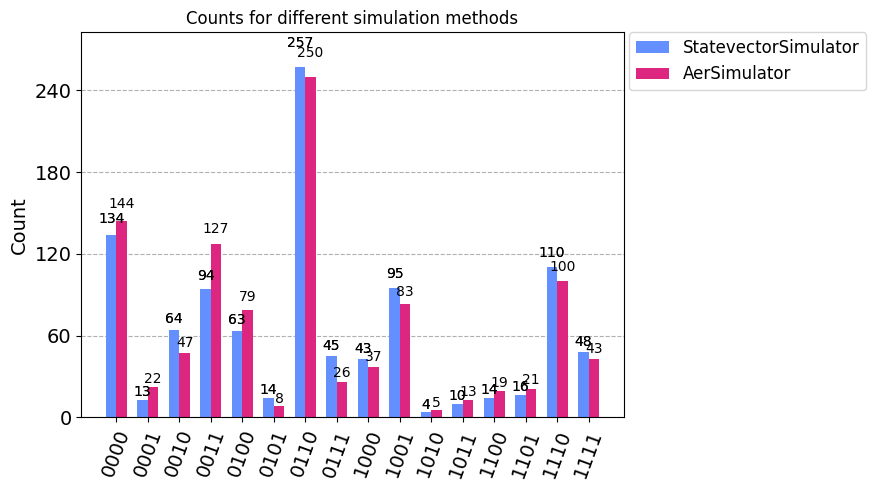

In [26]:
from qiskit.tools.visualization import plot_histogram, plot_state_city
plot_histogram([counts_ideal_st,counts_ideal_Aer],
               title='Counts for different simulation methods',
               legend=['StatevectorSimulator','AerSimulator'])

Qiskit Aer for QV benchmark：statevector

In [27]:
from qiskit_aer import AerSimulator

In [46]:
qubits = tuple(range(4))
qv_exp = QuantumVolume(qubits, seed=seed, trials=160)
print('experiment_options:',qv_exp.experiment_options)

experiment_options: Options(max_circuits=None, trials=160, seed=20)


In [47]:
# AerSimulator
backend_Aer = AerSimulator(method='statevector', 
                           precision='double',          # "single" or "double"
                           max_parallel_threads=0,      # maximum number of CPU cores used by OpenMP for parallelization
                           max_parallel_experiments=1,  # maximum number of qobj experiments that may be executed in parallel
                           max_parallel_shots=None,     # maximum number of shots that may be executed in parallel during each experiment execution
                           blocking_enable=False,       # enables parallelization with multiple GPUs or multiple processes with MPI (CPU/GPU)
                           blocking_qubits=0,           # number of qubits of chunk size used for parallelizing with multiple GPUs or multiple processes with MPI (CPU/GPU)
                           chunk_swap_buffer_qubits=15, # number of qubits of maximum buffer size (=2^chunk_swap_buffer_qubits) used for multiple chunk-swaps over MPI processes
                           batched_shots_gpu=False,     # enables batched execution of multiple shot simulations on GPU devices
                           batched_shots_gpu_max_qubits=16,
                           num_threads_per_device=1,    # number of threads per device
                           shot_branching_enable=False,
                           shot_branching_sampling_enable=False,
                           accept_distributed_results=None,
                           runtime_parameter_bind_enable=False,
                           statevector_parallel_threshold=25,
                           statevector_sample_measure_opt=10,
                           seed_simulator=seed, 
                           )
print('backend opt:',backend_Aer.options)

backend opt: Options(shots=1024, method='statevector', device='CPU', precision='double', executor=None, max_job_size=None, max_shot_size=None, enable_truncation=True, zero_threshold=1e-10, validation_threshold=None, max_parallel_threads=0, max_parallel_experiments=1, max_parallel_shots=None, max_memory_mb=None, fusion_enable=True, fusion_verbose=False, fusion_max_qubit=None, fusion_threshold=None, accept_distributed_results=None, memory=None, noise_model=None, seed_simulator=20, cuStateVec_enable=False, blocking_qubits=0, blocking_enable=False, chunk_swap_buffer_qubits=15, batched_shots_gpu=False, batched_shots_gpu_max_qubits=16, num_threads_per_device=1, shot_branching_enable=False, shot_branching_sampling_enable=False, statevector_parallel_threshold=25, statevector_sample_measure_opt=10, stabilizer_max_snapshot_probabilities=32, extended_stabilizer_sampling_method='resampled_metropolis', extended_stabilizer_metropolis_mixing_time=5000, extended_stabilizer_approximation_error=0.05, ex

In [48]:
expdata = qv_exp.run(backend_Aer).block_for_results()

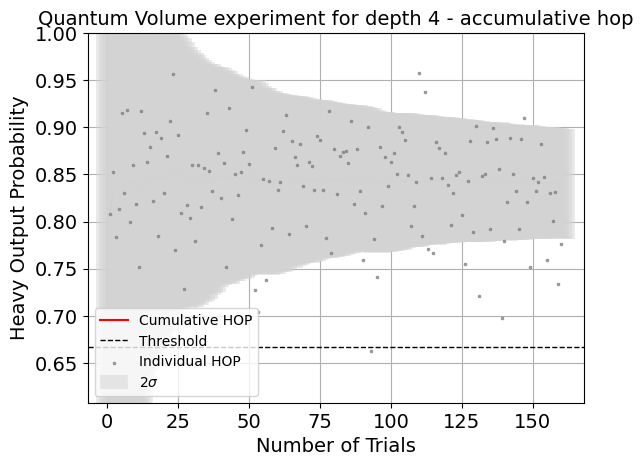

AnalysisResult
- name: mean_HOP
- value: 0.840+/-0.029
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False
AnalysisResult
- name: quantum_volume
- value: 16
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False


In [49]:
# View result data
display(expdata.figure(0))

for result in expdata.analysis_results():
    print(result)

In [50]:
# Print extra data
for result in expdata.analysis_results():
    print(f"\n{result.name} extra:")
    for key, val in result.extra.items():
        print(f"- {key}: {val}")


mean_HOP extra:
- HOPs: [0.8076171875, 0.8525390625, 0.783203125, 0.8134765625, 0.9150390625, 0.830078125, 0.91796875, 0.7998046875, 0.8603515625, 0.818359375, 0.751953125, 0.9169921875, 0.8935546875, 0.86328125, 0.87890625, 0.822265625, 0.8955078125, 0.7841796875, 0.888671875, 0.830078125, 0.869140625, 0.90625, 0.95703125, 0.76953125, 0.8916015625, 0.8095703125, 0.728515625, 0.8173828125, 0.8037109375, 0.8603515625, 0.779296875, 0.8603515625, 0.8154296875, 0.8564453125, 0.9150390625, 0.853515625, 0.83203125, 0.939453125, 0.873046875, 0.8251953125, 0.8623046875, 0.751953125, 0.9208984375, 0.802734375, 0.8505859375, 0.828125, 0.8525390625, 0.8740234375, 0.8974609375, 0.861328125, 0.9423828125, 0.7275390625, 0.7041015625, 0.775390625, 0.8447265625, 0.73828125, 0.8427734375, 0.79296875, 0.8779296875, 0.8330078125, 0.841796875, 0.896484375, 0.9130859375, 0.787109375, 0.8857421875, 0.8681640625, 0.8603515625, 0.8818359375, 0.837890625, 0.794921875, 0.86328125, 0.859375, 0.8330078125, 0.890

Qiskit Aer for QV benchmark：FakeSydneyV2
- [Fake Provider](https://docs.quantum.ibm.com/api/qiskit/providers_fake_provider)
- [IBM Compute resources](https://quantum.ibm.com/services/resources?tab=systems)

In [60]:
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeSydneyV2, FakeWashingtonV2

backend_fake = AerSimulator.from_backend(FakeWashingtonV2())

In [61]:
qv_exp.set_transpile_options(optimization_level=3)
expdata_fake = qv_exp.run(backend_fake).block_for_results()

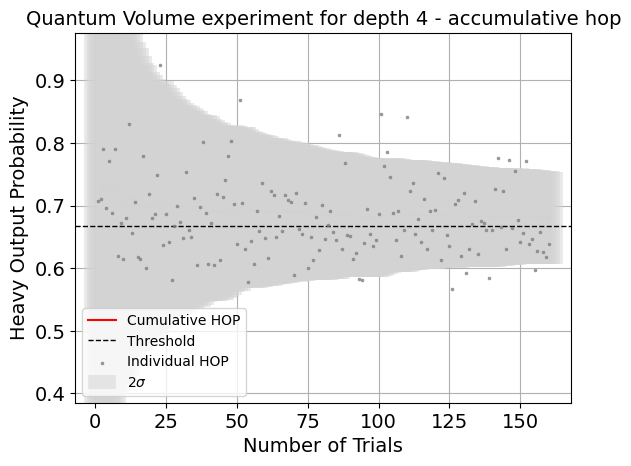

AnalysisResult
- name: mean_HOP
- value: 0.68+/-0.04
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False
AnalysisResult
- name: quantum_volume
- value: 1
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False


In [62]:
# View result data
display(expdata_fake.figure(0))

for result in expdata_fake.analysis_results():
    print(result)

In [63]:
# Print extra data
for result in expdata_fake.analysis_results():
    print(f"\n{result.name} extra:")
    for key, val in result.extra.items():
        print(f"- {key}: {val}")


mean_HOP extra:
- HOPs: [0.70703125, 0.7099609375, 0.7900390625, 0.6962890625, 0.771484375, 0.6875, 0.7900390625, 0.619140625, 0.6728515625, 0.6142578125, 0.6796875, 0.830078125, 0.65625, 0.7060546875, 0.6181640625, 0.6142578125, 0.7783203125, 0.599609375, 0.71875, 0.6796875, 0.6865234375, 0.7490234375, 0.923828125, 0.63671875, 0.6865234375, 0.6416015625, 0.5810546875, 0.6669921875, 0.69921875, 0.673828125, 0.6474609375, 0.75390625, 0.66015625, 0.650390625, 0.7119140625, 0.6044921875, 0.697265625, 0.8017578125, 0.6884765625, 0.6064453125, 0.6728515625, 0.6044921875, 0.71875, 0.61328125, 0.7138671875, 0.7412109375, 0.7783203125, 0.802734375, 0.703125, 0.638671875, 0.869140625, 0.7041015625, 0.6298828125, 0.5771484375, 0.6435546875, 0.6064453125, 0.69140625, 0.6591796875, 0.736328125, 0.6474609375, 0.6162109375, 0.72265625, 0.716796875, 0.650390625, 0.68359375, 0.6591796875, 0.716796875, 0.7080078125, 0.7060546875, 0.58984375, 0.7197265625, 0.6630859375, 0.6552734375, 0.7041015625, 0.59

qiskit to OpenQASM 2.0
- [QuantumCircuit](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#qasm)
- [OpenQASM 2](https://docs.quantum.ibm.com/api/qiskit/qasm2#qiskit.qasm2.dump)

In [82]:
import qiskit.qasm2
from qiskit.circuit import QuantumCircuit
qv_exp = QuantumVolume(qubits,seed=20)
qc = qv_exp.circuits() 
qc_qv = qc[1].decompose()
print(qiskit.qasm2.dumps(qc_qv))
qiskit.qasm2.dump(qc_qv, "qv-qc.qasm")

OPENQASM 2.0;
include "qelib1.inc";
gate unitary q0,q1 { u(1.506822212655652,1.1604947540522241,-1.4126093802159068) q0; u(1.9481452908072991,-2.85173245287079,2.4430409735424234) q1; cx q0,q1; u(0.8145309309950779,-pi/2,-pi/2) q0; u(1.2853314167620908,-0.28952380868541283,-0.7572938353421463) q1; cx q0,q1; u(0.21775231537581705,-pi,-pi/2) q0; u(1.9404355043262396,-2.97530256136434,2.0057018099940827) q1; cx q0,q1; u(1.2873890221247786,-1.0904319324361929,-0.5159221342758484) q0; u(1.6835234150269058,-2.826842680431339,2.4651852156519656) q1; }
gate unitary_139969657391616 q0,q1 { u(0.9631023768924853,2.526154794718967,2.3090908046134846) q0; u(2.161887927740813,-3.0421463418661325,1.5147691654493016) q1; cx q0,q1; u(0.7508256438853261,-pi/2,-pi/2) q0; u(1.2663669899294274,-0.2694486535270646,-0.8263261560793165) q1; cx q0,q1; u(0.18039017667944374,-pi,-pi/2) q0; u(1.9404355043262396,-2.97530256136434,2.0057018099940827) q1; cx q0,q1; u(1.2060310715020823,-1.4876712045907556,-1.1669359

openmp

In [178]:
from qiskit_algorithms.utils import algorithm_globals
algorithm_globals.random_seed = 20

In [179]:
sim = AerSimulator(method='statevector', device='GPU',shots=100, blocking_enable=True, blocking_qubits=23,seed_simulator=20)
print('backend opt:',sim.options)

backend opt: Options(shots=100, method='statevector', device='GPU', precision='double', executor=None, max_job_size=None, max_shot_size=None, enable_truncation=True, zero_threshold=1e-10, validation_threshold=None, max_parallel_threads=None, max_parallel_experiments=None, max_parallel_shots=None, max_memory_mb=None, fusion_enable=True, fusion_verbose=False, fusion_max_qubit=None, fusion_threshold=None, accept_distributed_results=None, memory=None, noise_model=None, seed_simulator=20, cuStateVec_enable=False, blocking_qubits=23, blocking_enable=True, chunk_swap_buffer_qubits=None, batched_shots_gpu=False, batched_shots_gpu_max_qubits=16, num_threads_per_device=1, shot_branching_enable=False, shot_branching_sampling_enable=False, statevector_parallel_threshold=14, statevector_sample_measure_opt=10, stabilizer_max_snapshot_probabilities=32, extended_stabilizer_sampling_method='resampled_metropolis', extended_stabilizer_metropolis_mixing_time=5000, extended_stabilizer_approximation_error=0

In [180]:
qubits = 4
qc_qv = qiskit.circuit.library.QuantumVolume(qubits,seed=20)
qc_qv.measure_all()
qc = qc_qv.decompose()

In [181]:
result = sim.run(qc).result()
counts_ideal_Aer = result.get_counts(0)
print('Counts(ideal):', counts_ideal_Aer)

Counts(ideal): {'1111': 5, '0010': 5, '1010': 4, '1001': 7, '1000': 12, '0011': 2, '1011': 4, '0111': 9, '0100': 11, '1101': 14, '0110': 12, '1110': 5, '0101': 10}


In [182]:
# sim = AerSimulator(method='statevector', device='GPU')
# result = execute(circuit, sim, blocking_enable=True, blocking_qubits=23).result()
dict = result.to_dict()
dict
# meta = dict['metadata']
# myrank = meta['mpi_rank']

{'backend_name': 'aer_simulator',
 'backend_version': '0.13.1',
 'date': '2024-02-05T03:42:48.923391',
 'header': None,
 'qobj_id': '',
 'job_id': 'fffe2cea-18ce-4cca-8198-61114003f90e',
 'status': 'COMPLETED',
 'success': True,
 'results': [{'shots': 100,
   'success': True,
   'data': {'counts': {'0xf': 5,
     '0x2': 5,
     '0xa': 4,
     '0x9': 7,
     '0x8': 12,
     '0x3': 2,
     '0xb': 4,
     '0x7': 9,
     '0x4': 11,
     '0xd': 14,
     '0x6': 12,
     '0xe': 5,
     '0x5': 10}},
   'meas_level': <MeasLevel.CLASSIFIED: 2>,
   'header': {'creg_sizes': [['meas', 4]],
    'global_phase': 0.0,
    'memory_slots': 4,
    'n_qubits': 4,
    'name': 'quantum_volume_[4,4,20]',
    'qreg_sizes': [['q', 4]],
    'metadata': {}},
   'status': 'DONE',
   'seed_simulator': 20,
   'metadata': {'time_taken': 0.0201408,
    'num_bind_params': 1,
    'parallel_state_update': 12,
    'parallel_shots': 1,
    'sample_measure_time': 0.0047917,
    'required_memory_mb': 1,
    'input_qubit_map'